In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import csv
import pandas as pd
import numpy as np
import import_ipynb
import martinaCharts
from scipy import stats

# Output File (CSV)
output_data_file = "output/CleanMovieData.csv"

importing Jupyter notebook from martinaCharts.ipynb


In [2]:
# File to Load 
MovieCredits = "tmdb_5000_credits.csv"
MovieData = "tmdb_5000_movies.csv"

CreditsDF = pd.read_csv(MovieCredits)
MoviesDF = pd.read_csv(MovieData)

CleanCreditsDF = CreditsDF[["movie_id","cast"]]
CleanCreditsDF = CleanCreditsDF.rename(columns = {"movie_id":"id","cast":"cast"})
CleanMoviesDF = MoviesDF[["budget","genres","id","original_language","popularity","release_date",
                         "revenue","runtime","title","vote_average","vote_count"]]
CleanedDF = pd.merge(CleanMoviesDF,CleanCreditsDF,on="id")

In [3]:
Cast = CleanedDF['cast']
CleanedDF.dtypes
CleanedDF['cast'].to_dict()
CleanedDF.head(2)
CleanedDF.dtypes
CleanedDF = CleanedDF.dropna()
CleanedDF.count()

budget               4800
genres               4800
id                   4800
original_language    4800
popularity           4800
release_date         4800
revenue              4800
runtime              4800
title                4800
vote_average         4800
vote_count           4800
cast                 4800
dtype: int64

In [6]:
#define genre list
genres = ['Action','Adventure','Animation','Comedy','Crime','Documentary','Drama','Family','Fantasy','Foreign',
          'History','Horror','Music','Mystery','Romance','Science Fiction','Thriller','TV Movie','War','Western']

#create a new column for each genre containing a boolean 
for genre in genres:
    CleanedDF[genre] = CleanedDF['genres'].str.contains(genre)

#show df   
CleanedDF.head()

,budget,genres,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,...,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,TV Movie,War,Western
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,...,False,False,False,False,False,True,False,False,False,False
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,...,False,False,False,False,False,False,False,False,False,False
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,...,False,False,False,False,False,False,False,False,False,False
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,...,False,False,False,False,False,False,True,False,False,False
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,...,False,False,False,False,False,True,False,False,False,False


In [7]:
#isolate release year, convert to int, and cut into decades
CleanedDF['Year'] = CleanedDF['release_date'].str.split('-').str[0]
CleanedDF['Year'] = pd.to_numeric(CleanedDF['Year'], errors='coerce')
decade_bins = [0,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020]
decade_labels = ["1910's","1920's","1930's","1940's","1950's","1960's","1970's","1980's","1990's","2000's","2010's"]
CleanedDF['Decade'] = pd.cut(CleanedDF['Year'], decade_bins, labels=decade_labels)

#show df
CleanedDF

,budget,genres,id,original_language,popularity,release_date,revenue,runtime,title,vote_average,...,Music,Mystery,Romance,Science Fiction,Thriller,TV Movie,War,Western,Year,Decade
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,150.437577,2009-12-10,2787965087,162.0,Avatar,7.2,...,False,False,False,True,False,False,False,False,2009,2000's
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,139.082615,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,...,False,False,False,False,False,False,False,False,2007,2000's
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,107.376788,2015-10-26,880674609,148.0,Spectre,6.3,...,False,False,False,False,False,False,False,False,2015,2010's
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,112.312950,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,...,False,False,False,False,True,False,False,False,2012,2010's
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,43.926995,2012-03-07,284139100,132.0,John Carter,6.1,...,False,False,False,True,False,False,False,False,2012,2010's
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",559,en,115.699814,2007-05-01,890871626,139.0,Spider-Man 3,5.9,...,False,False,False,False,False,False,False,False,2007,2000's
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",38757,en,48.681969,2010-11-24,591794936,100.0,Tangled,7.4,...,False,False,False,False,False,False,False,False,2010,2000's
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",99861,en,134.279229,2015-04-22,1405403694,141.0,Avengers: Age of Ultron,7.3,...,False,False,False,True,False,False,False,False,2015,2010's
8,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",767,en,98.885637,2009-07-07,933959197,153.0,Harry Potter and the Half-Blood Prince,7.4,...,False,False,False,False,False,False,False,False,2009,2000's
9,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",209112,en,155.790452,2016-03-23,873260194,151.0,Batman v Superman: Dawn of Justice,5.7,...,False,False,False,False,False,False,False,False,2016,2010's


In [8]:
# Export the Cleaned Data DF into a .csv.
# Need OS module to create new directory,and need encoding to convert to csv file
if("output_data"==False):
    os.mkdir('output')
CleanedDF.to_csv(output_data_file, encoding='utf-8', index=False)

PermissionError: [Errno 13] Permission denied: 'output/CleanMovieData.csv'

In [5]:
%run martinaCharts.ipynb
filmPERyear(CleanedDF)

KeyError: 'Decade'

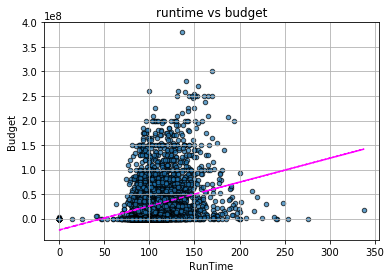

In [47]:
%run martinaCharts.ipynb
budgetVSruntime(CleanedDF)
#martinaCharts.budgetVSruntime(CleanedDF)